## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi

***don't mind this, i's only the colors I choose for my tables***

In [2]:
cm = sns.cubehelix_palette(15, start=2, rot=0, dark=1, light=0.15, as_cmap=True)

### Reading the scrapped data

In [3]:
df = pd.read_csv('./Data/liked_songs.csv')

### Looking for columns I don't need, and removing them

In [4]:
df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Siren 042,Lala Lala,0.601,0.596,11,-7.373,1,0.0251,0.694000,0.00579,0.1070,0.457,108.000,audio_features,75nN4kH1uzSsUdMrdUVfrq,spotify:track:75nN4kH1uzSsUdMrdUVfrq,https://api.spotify.com/v1/tracks/75nN4kH1uzSs...,https://api.spotify.com/v1/audio-analysis/75nN...,161043,4
1,Make Me A Song,Eleanor Friedberger,0.727,0.575,2,-8.295,1,0.0292,0.054800,0.01310,0.1230,0.622,129.993,audio_features,71GBQ7iVnffAGkNuTDxCoH,spotify:track:71GBQ7iVnffAGkNuTDxCoH,https://api.spotify.com/v1/tracks/71GBQ7iVnffA...,https://api.spotify.com/v1/audio-analysis/71GB...,332400,4
2,Uprising,Muse,0.602,0.905,2,-4.046,1,0.0775,0.000202,0.06400,0.1170,0.411,128.019,audio_features,4VqPOruhp5EdPBeR92t6lQ,spotify:track:4VqPOruhp5EdPBeR92t6lQ,https://api.spotify.com/v1/tracks/4VqPOruhp5Ed...,https://api.spotify.com/v1/audio-analysis/4VqP...,304840,4
3,Time Is Running Out,Muse,0.585,0.842,9,-5.883,0,0.0556,0.002420,0.00686,0.0866,0.428,118.211,audio_features,2takcwOaAZWiXQijPHIx7B,spotify:track:2takcwOaAZWiXQijPHIx7B,https://api.spotify.com/v1/tracks/2takcwOaAZWi...,https://api.spotify.com/v1/audio-analysis/2tak...,237040,4
4,Knights of Cydonia,Muse,0.366,0.963,11,-5.301,0,0.1420,0.000273,0.01220,0.1150,0.211,137.114,audio_features,7ouMYWpwJ422jRcDASZB7P,spotify:track:7ouMYWpwJ422jRcDASZB7P,https://api.spotify.com/v1/tracks/7ouMYWpwJ422...,https://api.spotify.com/v1/audio-analysis/7ouM...,366213,4


In [5]:
df.columns

Index(['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [6]:
df.drop(columns=['analysis_url', 'id', 'track_href', 'type',],inplace=True)

***later we will need the URI to search songs and add them to the playlist, so keep that***

### saving the new data frame with only the columns i want

In [7]:
df.to_csv('./Data/eda_data.csv',index=False)

### looking at my data for cleaning

In [8]:
df.shape

(1973, 16)

In [9]:
df.isnull().sum()

name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
uri                 0
duration_ms         0
time_signature      0
dtype: int64

In [10]:
df.dtypes

name                 object
artists              object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
uri                  object
duration_ms           int64
time_signature        int64
dtype: object

In [11]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1.973000e+03,1973.000000
mean,0.533689,0.618402,4.806386,-9.321920,0.761277,0.053515,0.309288,0.095951,0.193814,0.580806,122.207118,2.394527e+05,3.920426
std,0.143016,0.219213,3.542128,3.941399,0.426411,0.050983,0.283073,0.217938,0.158911,0.250657,28.405597,9.424493e+04,0.343372
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.042700e+04,0.000000
25%,0.430000,0.468000,2.000000,-11.254000,1.000000,0.031800,0.058500,0.000009,0.093300,0.389000,103.912000,1.794000e+05,4.000000
50%,0.533000,0.637000,5.000000,-8.940000,1.000000,0.038800,0.221000,0.000729,0.129000,0.601000,119.991000,2.232530e+05,4.000000
75%,0.636000,0.795000,8.000000,-6.631000,1.000000,0.053700,0.511000,0.034900,0.249000,0.790000,138.508000,2.747470e+05,4.000000
max,0.943000,0.997000,11.000000,-1.568000,1.000000,0.924000,0.994000,0.978000,0.952000,0.990000,216.304000,1.051853e+06,5.000000


#### minimum cleaning needed since spotify scrapped all the data from my liked songs and there are no nulls

### looking to see what are the top 5 artists in my liked songs

In [12]:
df['artists'].value_counts().head()

The Rolling Stones        423
The Velvet Underground    195
Led Zeppelin               73
Fleetwood Mac              68
The Doors                  67
Name: artists, dtype: int64

**WOW! they are actually my top 5 favorite bands**

### check to see if theer are any duplicate songs, if so what are they? 
**I will drop the duplicate songs, and only keeping one of each**

In [13]:
duplicatesongs = df[df['name'].duplicated(keep='last')]
duplicatesongs['name'].value_counts()

What Goes On                       5
Lady Godiva's Operation            4
Lisa Says                          4
Temptation Inside Your Heart       3
Beginning To See The Light         3
                                  ..
Tumbling Dice                      1
Hitch Hike - Remastered 2002       1
L'Indien                           1
Pain In My Heart                   1
Brass in Pocket - 2006 Remaster    1
Name: name, Length: 190, dtype: int64

**there are exactly 190 songs that I have multiples of in my liked songs**

In [14]:
df=df.drop_duplicates(subset=['name'],keep='last')

keep in mind that duplicate songs are actually multiples, so although there are only 190 songs, but since there are multiple of some that means that more than 190 rows are going to be dropped 

### I will also drop "23 Seconds of Silence" by Wilco, because that's exactly what is it, just 23 seconds of silence

***with them gone now i only have 1734 songs in my data frame***
- this is becaouse some of the songs were repeated more than once 
- I will save this as a new file as well since I don't want to have to worry about multiple songs anymore. 

In [15]:
df[df['name']==('23 Seconds of Silence')]

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
468,23 Seconds of Silence,Wilco,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,spotify:track:5gItCsadLbVlHdJOZ3fyLE,22880,0


In [16]:
df.drop(index= 468, inplace=True)

In [17]:
df.shape

(1734, 16)

### I will add the name of the song, to the artist, and lower case everything for ease of use, name the new colomn index, and drop the column name and artists. I will also rearrenge my columns based on what I think is most important to me

In [18]:
df['name'] = df['name']+', '+df['artists']
df['index'] = df['name'].str.lower()

In [19]:
df.drop(columns=['artists','name'], inplace= True)

In [20]:
df= df[['index','uri','tempo','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','time_signature', 'duration_ms']]
df.head()

,index,uri,tempo,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,duration_ms
0,"siren 042, lala lala",spotify:track:75nN4kH1uzSsUdMrdUVfrq,108.000,0.601,0.596,11,-7.373,1,0.0251,0.694000,0.00579,0.1070,0.457,4,161043
1,"make me a song, eleanor friedberger",spotify:track:71GBQ7iVnffAGkNuTDxCoH,129.993,0.727,0.575,2,-8.295,1,0.0292,0.054800,0.01310,0.1230,0.622,4,332400
2,"uprising, muse",spotify:track:4VqPOruhp5EdPBeR92t6lQ,128.019,0.602,0.905,2,-4.046,1,0.0775,0.000202,0.06400,0.1170,0.411,4,304840
3,"time is running out, muse",spotify:track:2takcwOaAZWiXQijPHIx7B,118.211,0.585,0.842,9,-5.883,0,0.0556,0.002420,0.00686,0.0866,0.428,4,237040
4,"knights of cydonia, muse",spotify:track:7ouMYWpwJ422jRcDASZB7P,137.114,0.366,0.963,11,-5.301,0,0.1420,0.000273,0.01220,0.1150,0.211,4,366213


In [21]:
df.to_csv('./Data/no_multiples.csv',index=False)

### let's take a look at the overall relation between the features

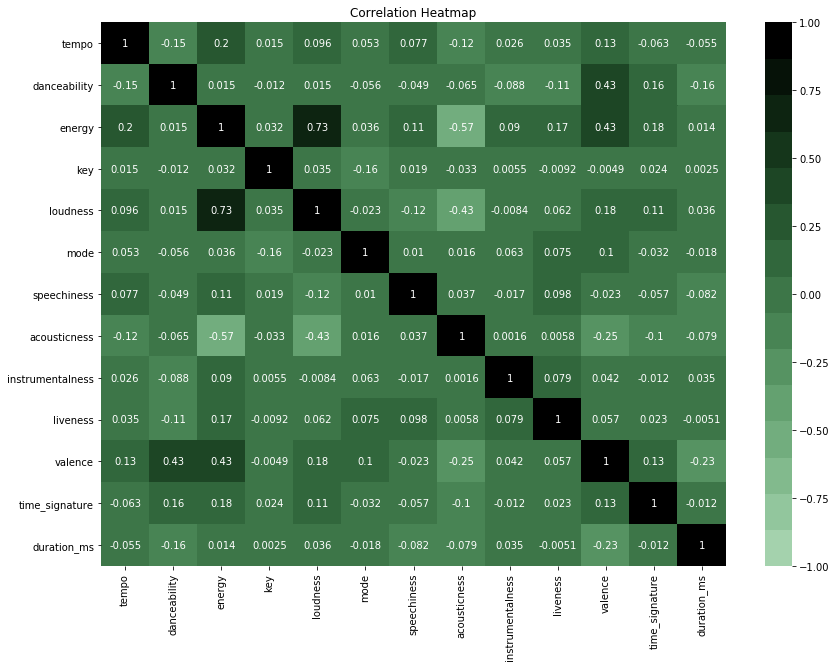

In [22]:
plt.figure(figsize=(14,10))
cmap= sns.cubehelix_palette(15, start=2, rot=0, dark=0, light=.75, reverse=False)
sns.heatmap(df.corr(),  cmap = cmap, vmin=-1, vmax=1,  annot=True);
plt.title("Correlation Heatmap")
plt.savefig("./Assets/heatmap.png")

- okay, looking at the relations we can see that dancibility has a high correlation with valence (how happy a song is), but no other significant relations with any other features, not even the tempo, which is interesting to see. as a matter of fact dancability seems to have a negative correlation with tempo! 
- energy seems to be directly correlated with higher valence. songs that are higher in energy seem to also be VERY LOUD! and it looks like they have a very negative relation with acusticness, meaning high enrgy songs are not acoustic and accustic songs are low in energy! 
- key, mode, speechiness, instrumentalness,liveness,  seem to have NO EFFECT on the rest of a features.
- acousticness seems to have a negative correlation with many of the features, most notebly on it's loudness and it's energy.
- to my surprise tempo dosen't seem to be highly correlated to dancability, energy or the valence of the song. however songs with higher tempo seem to be just moderatly related to it's time-signiture, I was expecting a much stronger correlation. 
- duration of a song, seems to have the most negative corelation with other features,(as the songs get longer the seem to have lower values in the rest of the features. the most noteables are: valance and dancibility. so basically sad songs tend to be longer! what surprised me is that longer songs are less likely to be live. I though duration and liveness would have a possitive correlation, since live performances tend to have a monolog before or after the perfermance, or could have a longer guitar solo. however longer songs are VERY wealky correlated with instrumentalism... but not a significant relation between the two. 

### and let's look at some distributions as well:

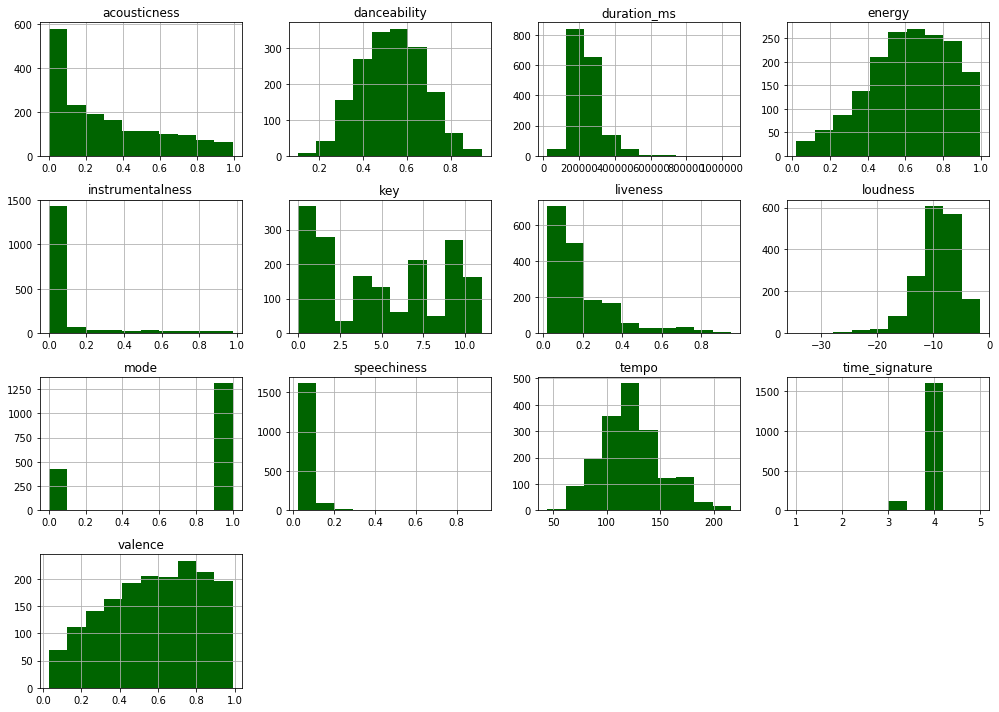

In [23]:
df.hist(figsize=(14,10),color = 'darkgreen')
plt.tight_layout()
plt.savefig("./Assets/distribution.png");

* **there are a lot of right skewness in the data, speechiness, instrumentaliness, livelyness, and acousticness**
* **there are some left skewness as well such as time signeture, that seems like 4 is the most popular. energy and valence are also left skewed.**
* **in the case of loudness there seems to be an outlier causing the distrubution to appear more skewed than it would normally be.**
* **there seems to be a an outlier in the duration as well, I will be checking for those.**

### let's take a look at data distribution in time signature, and the mode

In [24]:
df['time_signature'].value_counts()

4    1602
3     115
1       9
5       8
Name: time_signature, dtype: int64

In [25]:
df['mode'].value_counts()

1    1308
0     426
Name: mode, dtype: int64

In [26]:
df[df['mode']==0].head().\
    style.set_caption('first 5 songs with mode = 0').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,uri,tempo,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,duration_ms
3,"time is running out, muse",spotify:track:2takcwOaAZWiXQijPHIx7B,118.211000,0.585000,0.842000,9,-5.883000,0,0.055600,0.002420,0.006860,0.086600,0.428000,4,237040
4,"knights of cydonia, muse",spotify:track:7ouMYWpwJ422jRcDASZB7P,137.114000,0.366000,0.963000,11,-5.301000,0,0.142000,0.000273,0.012200,0.115000,0.211000,4,366213
6,"like a hurricane - 2017 remaster, neil young",spotify:track:1n6gDSllAqVSweuFD82hNH,113.829000,0.424000,0.864000,9,-4.532000,0,0.036500,0.012800,0.002150,0.149000,0.571000,4,497493
7,"smile like you mean it, the killers",spotify:track:4kAgnAL4WKx7YqnlL2fvMh,125.087000,0.362000,0.979000,3,-2.581000,0,0.161000,0.000378,0.015100,0.231000,0.383000,4,234107
10,"canopée, polo & pan",spotify:track:260V7huyJrXnyYe0dFv2Fa,96.005000,0.704000,0.692000,5,-6.558000,0,0.030400,0.094200,0.010900,0.092200,0.369000,4,276293


In [27]:
df[df['mode']==1].head().\
    style.set_caption('first 5 songs with mode = 0').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,uri,tempo,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,duration_ms
0,"siren 042, lala lala",spotify:track:75nN4kH1uzSsUdMrdUVfrq,108.000000,0.601000,0.596000,11,-7.373000,1,0.025100,0.694000,0.005790,0.107000,0.457000,4,161043
1,"make me a song, eleanor friedberger",spotify:track:71GBQ7iVnffAGkNuTDxCoH,129.993000,0.727000,0.575000,2,-8.295000,1,0.029200,0.054800,0.013100,0.123000,0.622000,4,332400
2,"uprising, muse",spotify:track:4VqPOruhp5EdPBeR92t6lQ,128.019000,0.602000,0.905000,2,-4.046000,1,0.077500,0.000202,0.064000,0.117000,0.411000,4,304840
5,"vicious, lou reed",spotify:track:4A48NL57P16zSRaq3yoYry,124.247000,0.605000,0.846000,2,-7.755000,1,0.033700,0.000600,0.886000,0.052600,0.952000,4,176533
8,"season of the witch, donovan",spotify:track:6MOEQCtAWNSCmvg3SFKF5y,99.735000,0.516000,0.513000,2,-10.762000,1,0.028800,0.159000,0.009570,0.061200,0.694000,4,293933


### loudness of each track 

In [28]:
loudness = df.drop(columns=['danceability','duration_ms','time_signature','energy','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','uri'])

In [29]:
loudness.sort_values(by=['loudness']).head(10).\
    style.set_caption('first 10 quietest songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,loudness
446,"dawn's highway, jim morrison",-34.496000
441,"freedom exists, jim morrison",-29.395000
1769,"the hitchhiker, jim morrison",-27.889000
444,"to come of age, jim morrison",-26.753000
521,"i won't hurt you, the west coast pop art experimental band",-26.134000
1676,"dream of you and i, jeff buckley",-25.852000
447,"lament, jim morrison",-24.871000
669,"key to the highway - piano instrumental/remastered 2009, the rolling stones",-24.408000
448,"bird of prey, jim morrison",-24.232000
261,"tu m'avais dit - acoustic version, alice et moi",-23.957000


In [30]:
loudness.sort_values(by=['loudness']).tail(10).style.\
    set_caption('first 10 loudest songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,loudness
214,"queen of peace, florence + the machine",-2.621000
1430,"nina cried power (feat. mavis staples), hozier",-2.611000
1670,"eternal life, jeff buckley",-2.605000
7,"smile like you mean it, the killers",-2.581000
1209,"you give love a bad name, bon jovi",-2.571000
1467,"just my imagination (running away with me) - remastered, the rolling stones",-2.535000
589,"remember the time, michael jackson",-2.383000
1471,"before they make me run - remastered, the rolling stones",-2.304000
1466,"when the whip comes down - remastered, the rolling stones",-1.871000
1469,"lies - remastered, the rolling stones",-1.568000


#### You Give Love A Bad Name is the 6th loudest song in my liked list, that explain my almost heart attack! 

### each song's duration

#### I will convert the duration to minouts by (divide the time value by 60000) to get a better grasp of whta is what

In [31]:
duration= df.drop(columns=['danceability','loudness', 'time_signature','energy','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','uri'])

In [32]:
duration['duration_m']= duration['duration_ms']/60000

In [33]:
duration.sort_values(by=['duration_m']).head(10).\
    style.set_caption('first 10 shortest songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,duration_ms,duration_m
441,"freedom exists, jim morrison",20427,0.340450
450,"american night, jim morrison",28453,0.474217
669,"key to the highway - piano instrumental/remastered 2009, the rolling stones",33467,0.557783
443,"awake, jim morrison",35800,0.596667
444,"to come of age, jim morrison",61627,1.027117
448,"bird of prey, jim morrison",63773,1.062883
1358,"lazing on a sunday afternoon - remastered 2011, queen",67400,1.123333
1817,"black polished chrome, jim morrison",67880,1.131333
1355,"god save the queen - remastered 2011, queen",75347,1.255783
1770,"hour for magic, jim morrison",77907,1.298450


In [34]:
duration.sort_values(by=['duration_m']).tail(10).\
    style.set_caption('first 10 longest songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,duration_ms,duration_m
21,"ocean - live from the matrix, san francisco, ca / 1969, the velvet underground",659200,10.986667
1732,"when the music's over, the doors",659267,10.987783
1528,"in my time of dying - 1990 remaster, led zeppelin",665600,11.093333
758,"blow with ry, the rolling stones",667918,11.131967
815,"going home, the rolling stones",673253,11.220883
1740,"the end, the doors",703373,11.722883
937,"the end - 2017 remaster, the doors",710827,11.847117
1396,"1983...(a merman i should turn to be), jimi hendrix",819627,13.660450
1389,"voodoo chile, jimi hendrix",899933,14.998883
1515,"sister ray, the velvet underground",1050120,17.502000


### let's also take a look at what the average duration seems to be 

In [35]:
duration.groupby(['duration_ms']).sum().mean()

duration_m    4.144595
dtype: float64

***on average songs are just a little over 4 minoutes long***

### acousticness

In [36]:
acousticness = df.drop(columns=['danceability','duration_ms','time_signature','energy','key','mode','speechiness','loudness','instrumentalness','liveness','valence','tempo','uri'])
acousticness.sort_values(by=['acousticness']).head(10).\
    style.set_caption('10 least acoustic songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,acousticness
1908,"what goes on, the velvet underground",0.000022
1410,"london - 2011 remaster, the smiths",0.000038
1105,"dancing with myself - 2001 remaster, billy idol",0.000058
1000,"paranoid, black sabbath",0.000084
1638,"hand in glove - 2011 remaster, the smiths",0.000090
1412,"girl afraid - 2011 remaster, the smiths",0.000108
619,"flip the switch - remastered, the rolling stones",0.000119
1294,"an illustration of loneliness (sleepless in new york), courtney barnett",0.000126
1229,"you ain't seen nothing yet, bachman-turner overdrive",0.000146
1941,"come as you are, nirvana",0.000160


In [37]:
acousticness.sort_values(by=['acousticness']).tail(10).\
    style.set_caption('10 most acoustic songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,acousticness
127,"l'accident, juliette armanet",0.968000
169,"so naïve, villagers",0.968000
521,"i won't hurt you, the west coast pop art experimental band",0.970000
536,"little green, joni mitchell",0.975000
141,"alexandre, juliette armanet",0.976000
140,"sous la pluie, juliette armanet",0.979000
1700,"songbird - 2004 remaster, fleetwood mac",0.982000
173,"no one to blame, villagers",0.985000
1669,"corpus christi carol, jeff buckley",0.993000
669,"key to the highway - piano instrumental/remastered 2009, the rolling stones",0.994000


### now let's take a look at the speechiness

In [38]:
speechiness = df.drop(columns=['danceability','duration_ms','acousticness','time_signature','energy','key','mode','loudness','instrumentalness','liveness','valence','tempo','uri'])
speechiness.sort_values(by=['speechiness']).head(10).\
    style.set_caption('10 least speechy songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,speechiness
1427,"unloveable - 2011 remaster, the smiths",0.022500
656,"almost hear you sigh - remastered, the rolling stones",0.023200
580,"high on emotion, chris de burgh",0.023500
1682,"book of love - 2016 remaster, fleetwood mac",0.023700
1759,"waiting for the sun, the doors",0.023700
490,"into the great wide open, tom petty and the heartbreakers",0.023800
1628,"paint a vulgar picture - 2011 remaster, the smiths",0.023800
1681,"that's alright - 2016 remaster, fleetwood mac",0.023900
1323,"pain is so close to pleasure - remastered 2011, queen",0.024000
513,"the first cut is the deepest, rod stewart",0.024400


In [39]:
speechiness.sort_values(by=['speechiness']).tail(10).\
    style.set_caption('10 most speechy songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,speechiness
555,"keep a knockin, little richard",0.366000
1397,"voodoo child (slight return), jimi hendrix",0.389000
109,"sweet jane - live, the velvet underground",0.401000
1966,"whole lotta love - 1990 remaster, led zeppelin",0.405000
450,"american night, jim morrison",0.426000
446,"dawn's highway, jim morrison",0.435000
1562,"whole lotta love - remaster, led zeppelin",0.437000
447,"lament, jim morrison",0.444000
441,"freedom exists, jim morrison",0.878000
444,"to come of age, jim morrison",0.924000


***this makes total sence, most speechiness tracks on here are from Jim Morrison's An American Prayer. which is just an album where he reads some of his poems***

### danceability

In [40]:
danceability= df.drop(columns=['duration_ms','loudness', 'time_signature','energy','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','uri'])

In [41]:
danceability.sort_values(by=['danceability']).head(10).\
    style.set_caption('10 least dancable songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,danceability
1355,"god save the queen - remastered 2011, queen",0.104000
377,"voilà, françoise hardy",0.125000
1492,"ride into the sun - session outtake; 2015 remaster, the velvet underground",0.144000
1324,"who wants to live forever - remastered 2011, queen",0.177000
1402,"born to die, lana del rey",0.180000
1364,"who wants to live forever - 2011 remaster, queen",0.180000
88,"hey mr. rain - version 1, the velvet underground",0.184000
846,"i'm moving on - live, the rolling stones",0.188000
944,"nights in white satin - single version / mono mix, the moody blues",0.195000
1521,"heroin, the velvet underground",0.201000


In [42]:
danceability.sort_values(by=['danceability']).tail(10).\
    style.set_caption('10 most dancable songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,danceability
1872,"i'm a king bee, the rolling stones",0.886000
1491,"i love you - session outtake; 2015 remaster, the velvet underground",0.895000
151,"science fiction, christine and the queens",0.907000
334,"prettiest virgin, agar agar",0.914000
1120,"billie jean, michael jackson",0.920000
1332,"another one bites the dust, queen",0.926000
1367,"another one bites the dust - 2011 remaster, queen",0.928000
1128,"another one bites the dust - remastered 2011, queen",0.933000
1203,"this must be the place (naive melody) - 2005 remaster, talking heads",0.942000
585,"dangerous, michael jackson",0.943000


## let me start by saying how happy I am to see my dancability distribution is very normal, and not skewned to either side
### secondly, how can we just apperatiate that queen has made some of the most danceable and nonce danceble songs out there?!
#### lastly, is it weird that i dance to "heyr, mr. rain"?!

### Energy 

In [43]:
energy = df.drop(columns=['duration_ms','loudness', 'time_signature','danceability','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','uri'])

In [44]:
energy.sort_values(by=['energy']).head(10).\
    style.set_caption('10 least energetic songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,energy
1673,"don't let the sun catch you cryin', jeff buckley",0.020800
177,"dogwood blossom, fionn regan",0.024700
432,"satisfied mind - live at wfmu, east orange, nj - oct 1992, jeff buckley",0.027500
1675,"calling you, jeff buckley",0.036500
297,"song to the siren - take 7, tim buckley",0.051300
1435,"mama, you been on my mind - studio outtake - 1993, jeff buckley",0.053300
1775,"candy says, the velvet underground",0.059600
1502,"jesus, the velvet underground",0.063200
434,"if you knew - live at sin-é, new york, ny - july/august 1993, jeff buckley",0.063700
389,"i'm sticking with you, the velvet underground",0.065100


In [45]:
energy.sort_values(by=['energy']).tail(10).\
    style.set_caption('10 most energetic songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,energy
1410,"london - 2011 remaster, the smiths",0.984000
667,"had it with you - remastered, the rolling stones",0.985000
1417,"ask - 2011 remaster, the smiths",0.986000
1466,"when the whip comes down - remastered, the rolling stones",0.986000
1470,"respectable - remastered, the rolling stones",0.990000
702,"where the boys go - remastered, the rolling stones",0.993000
650,"sad sad sad - remastered, the rolling stones",0.993000
660,"fight - remastered, the rolling stones",0.994000
1469,"lies - remastered, the rolling stones",0.997000
662,"hold back - remastered, the rolling stones",0.997000


### okay... so jeff buckley maked low energy songs ***(AMAZING VOCALS)*** and the stones make high energy music! 
***ps, if you have not seen stone live, what are you even doing with your life? go see them right after the pandemic, they are just as high energy this chart claims, if not more***

### liveness

In [46]:
liveness = df.drop(columns=['duration_ms','loudness', 'time_signature','danceability','key','mode','speechiness','acousticness','instrumentalness','energy','valence','tempo','uri'])

In [47]:
liveness.sort_values(by=['liveness']).head(10).\
    style.set_caption('10 least live sounding songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,liveness
203,"heartlines, florence + the machine",0.018700
663,"too rude - remastered, the rolling stones",0.023100
1928,"hey joe, jimi hendrix",0.024400
691,"cherry oh baby - remastered, the rolling stones",0.028000
1203,"this must be the place (naive melody) - 2005 remaster, talking heads",0.028000
546,"monday morning blues (blues for mr. g.), b.b. king",0.029700
1691,"oh diane - early version; 2016 remaster, fleetwood mac",0.030200
1526,"custard pie - 1990 remaster, led zeppelin",0.031600
850,"hitch hike - remastered 2002, the rolling stones",0.032500
529,"the city, fleetwood mac",0.033100


In [48]:
liveness.sort_values(by=['liveness']).tail(10).\
    style.set_caption('10 most live sounding songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,liveness
651,"mixed emotions, the rolling stones",0.830000
1176,"wish you were here, pink floyd",0.832000
323,"la chanson de delphine, clara luciani",0.837000
588,"thriller, michael jackson",0.847000
577,"don't pay the ferryman, chris de burgh",0.852000
1192,"défiler - bande originale de la capsule no. 5 mosaert, stromae",0.856000
1558,"misty mountain hop - remaster, led zeppelin",0.860000
866,"oh baby (we got a good thing goin') - remastered 2002, the rolling stones",0.882000
660,"fight - remastered, the rolling stones",0.912000
912,"wipe out, the surfaris",0.952000


### the fact that jeff buckly's and velvet undergound's live recordings ***to which i listen to daily*** are not showing up here, speaks volumes!

### tempo

In [49]:
tempo = df.drop(columns=['duration_ms','loudness', 'time_signature','danceability','key','mode','speechiness','acousticness','instrumentalness','energy','valence','liveness','uri'])

In [50]:
tempo.sort_values(by=['tempo']).head(10).\
    style.set_caption('10 songs with slowest tempo').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,tempo
1728,"horse latitudes, the doors",44.323000
221,"jenny of oldstones (game of thrones), florence + the machine",46.489000
448,"bird of prey, jim morrison",48.655000
1386,"red house, jimi hendrix",53.905000
1614,"blue and lonesome, the rolling stones",57.772000
202,"seven devils, florence + the machine",58.534000
1440,"you baby, the lovin' spoonful",61.639000
205,"no light, no light - mtv unplugged, 2012, florence + the machine",61.682000
377,"voilà, françoise hardy",61.840000
299,"song to the siren, tim buckley",62.027000


In [51]:
tempo.sort_values(by=['tempo']).tail(10).\
    style.set_caption('10 songs with highest tempo').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,tempo
1039,"don't get me wrong - 2007 remaster, pretenders",203.617000
1152,"bad reputation, joan jett & the blackhearts",203.715000
1294,"an illustration of loneliness (sleepless in new york), courtney barnett",203.724000
1134,"beautiful girls - 2015 remaster, van halen",205.025000
1527,"the rover - 1993 remaster, led zeppelin",205.470000
812,"lady jane - mono version, the rolling stones",205.687000
1211,"i want you to want me - live at nippon budokan, tokyo, jpn - april 1978, cheap trick",206.568000
1437,"blues in the bottle, the lovin' spoonful",208.916000
1858,"desolation row - take 2, piano demo, bob dylan",210.134000
893,"time is on my side - mono version / organ intro, the rolling stones",216.304000


### valence

In [52]:
valence = df.drop(columns=['duration_ms','loudness', 'time_signature','danceability','key','mode','speechiness','acousticness','instrumentalness','energy','tempo','liveness','uri'])

In [53]:
valence.sort_values(by=['valence']).head(10).\
    style.set_caption('10 saddest songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,valence
1387,"...and the gods made love, jimi hendrix",0.029800
937,"the end - 2017 remaster, the doors",0.032900
1740,"the end, the doors",0.033200
311,"des gens bien, grand blanc",0.035200
301,"evidence (molecule remix), grand blanc",0.035600
450,"american night, jim morrison",0.036800
1403,"carmen, lana del rey",0.037600
1324,"who wants to live forever - remastered 2011, queen",0.038600
1364,"who wants to live forever - 2011 remaster, queen",0.038800
254,"ribs, lorde",0.039900


In [54]:
valence.sort_values(by=['valence']).tail(10).\
    style.set_caption('10 happiest songs').\
    background_gradient(cmap=cm, low=0, high= 12)

,index,valence
345,"jouer le jeu, the pirouettes",0.972000
1163,"hungry heart, bruce springsteen",0.972000
764,"bitch - 2009 mix, the rolling stones",0.973000
1461,"bald headed lena, the lovin' spoonful",0.974000
1890,"boogie with stu - 1993 remaster, led zeppelin",0.975000
1109,"addicted to love, robert palmer",0.975000
1930,"no particular place to go, chuck berry",0.975000
567,"no particular place to go - single version, chuck berry",0.975000
1292,"happy man, iggy pop",0.976000
1197,"low rider, war",0.990000


### honestly, no comment on the last two cathegories!!!

### I probably should have paied more attention during my piano lessons and practiced my notes, so I could actually interprete what keys mean, but for mow, here is a distribution, looks like Dminor is really unpopular! 
#### let's see what songs are in D-minor and other keys

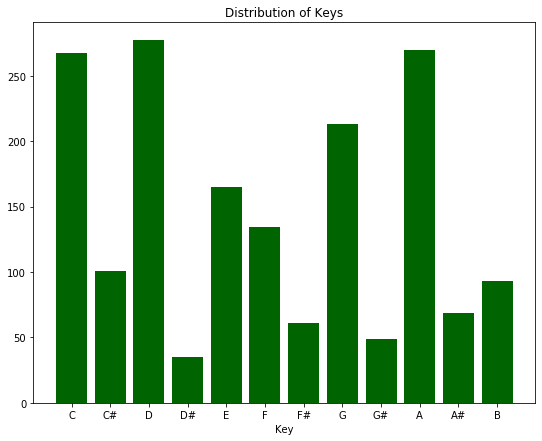

In [55]:
plt.figure(figsize=(9,7))

plt.bar(['C','C#', 'D', 'D#', 'E', 'F','F#','G', 'G#', 'A', 'A#','B'],
        df['key'].value_counts().sort_index(), color = 'darkgreen');


plt.title("Distribution of Keys")
plt.xlabel("Key", );
plt.ylabel('');
plt.savefig("./Assets/key.png")

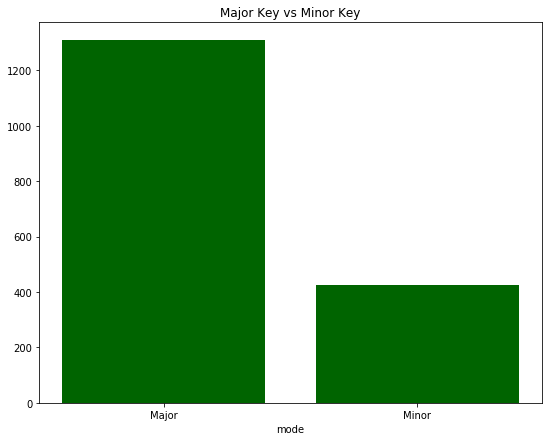

In [56]:
plt.figure(figsize=(9,7))
plt.bar(['Major', 'Minor'], df['mode'].value_counts(), color = 'darkgreen');
plt.xticks([0,1]);

plt.title("Major Key vs Minor Key")
plt.xlabel("mode");
plt.ylabel('');
plt.savefig("./Assets/mode.png")

In [57]:
key = df.drop(columns=['duration_ms','loudness', 'time_signature','danceability','valence','mode','speechiness','acousticness','instrumentalness','energy','tempo','liveness','uri'])

In [58]:
key.groupby('key').agg(['count']).\
    style.set_caption('number of songs per key').\
    background_gradient(cmap=cm, low=0, high= 12)

,index
,count
key,
0,267
1,101
2,277
3,35
4,165
5,134
6,61
7,213


In [59]:
key[key['key']==0].head().\
    style.set_caption("first 5 songs in the 'C' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
13,"free, cat power",0
19,"new age - live from the matrix, san francisco, ca / 1969, the velvet underground",0
20,"rock and roll - live from the matrix, san francisco, ca / 1969, the velvet underground",0
44,"wordless, the velvet underground",0
52,"new age, the velvet underground",0


In [60]:
key[key['key']==1].head().\
    style.set_caption("first 5 songs in the 'C#' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
139,"cool cat, juliette armanet",1
149,"no harm is done (feat. tunji ige), christine and the queens",1
161,"intranquillité, christine and the queens",1
180,"breaking down, florence + the machine",1
221,"jenny of oldstones (game of thrones), florence + the machine",1


In [61]:
key[key['key']==2].head().\
    style.set_caption("first 5 songs in the 'D' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
1,"make me a song, eleanor friedberger",2
2,"uprising, muse",2
5,"vicious, lou reed",2
8,"season of the witch, donovan",2
9,"harvest moon, neil young",2


In [62]:
key[key['key']==3].head().\
    style.set_caption("first 5 songs in the 'D#' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
7,"smile like you mean it, the killers",3
67,"ferryboat bill, the velvet underground",3
347,"now that you're gone, camp claude",3
351,"lille, voyou",3
377,"voilà, françoise hardy",3


In [63]:
key[key['key']==4].head().\
    style.set_caption("first 5 songs in the 'E' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
12,"les bateaux, pépite",4
43,"jack & jane, the velvet underground",4
88,"hey mr. rain - version 1, the velvet underground",4
176,"everything i am is yours, villagers",4
185,"too much is never enough, florence + the machine",4


In [64]:
key[key['key']==5].head().\
    style.set_caption("first 5 songs in the 'F' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
10,"canopée, polo & pan",5
15,"beginning to see the light - closet mix, the velvet underground",5
23,"pale blue eyes - closet mix, the velvet underground",5
45,"send no letter, the velvet underground",5
112,"pale blue eyes - live, the velvet underground",5


In [65]:
key[key['key']==6].head().\
    style.set_caption("first 5 songs in the 'F#' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
46,"caroline, the velvet underground",6
232,"you've got the love, florence + the machine",6
243,"sober, lorde",6
246,"white teeth teens, lorde",6
255,"team, lorde",6


In [66]:
key[key['key']==7].head().\
    style.set_caption("first 5 songs in the 'G' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
21,"ocean - live from the matrix, san francisco, ca / 1969, the velvet underground",7
33,"chelsea girls, nico",7
63,"ocean, the velvet underground",7
91,"guess i'm falling in love - instrumental version, the velvet underground",7
116,"some kinda love - live, the velvet underground",7


In [67]:
key[key['key']==8].head().\
    style.set_caption("first 5 songs in the 'G#' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
154,"the loving cup, christine and the queens",8
160,"doesn't matter, christine and the queens",8
162,"saint claude (version française), christine and the queens",8
222,"sky full of song, florence + the machine",8
238,"sober ii (melodrama), lorde",8


In [68]:
key[key['key']==9].head().\
    style.set_caption("first 5 songs in the 'A' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
3,"time is running out, muse",9
6,"like a hurricane - 2017 remaster, neil young",9
27,"hey mr. rain - version one, the velvet underground",9
48,"little jack, the velvet underground",9
87,"hey mr. rain - version 2, the velvet underground",9


In [69]:
key[key['key']==10].head().\
    style.set_caption("first 5 songs in the 'A#' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
11,"saat vayse, zedbazi",10
113,"i can't stand it anymore - live, the velvet underground",10
204,"hiding, florence + the machine",10
214,"queen of peace, florence + the machine",10
231,"shake it out, florence + the machine",10


In [70]:
key[key['key']==11].head().\
    style.set_caption("first 5 songs in the 'B' key").\
    background_gradient(cmap=cm, low=0, high= 12)

,index,key
0,"siren 042, lala lala",11
4,"knights of cydonia, muse",11
151,"science fiction, christine and the queens",11
153,"ugly-pretty, christine and the queens",11
156,"safe and holy, christine and the queens",11


## it is now time to build a recomender model!